In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/train.csv')
df_test= pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
columns=['PassengerId','Name','Cabin','Ticket']
data_2=df_train.drop(columns,axis=1)

In [ ]:
columns=['PassengerId','Name','Cabin','Ticket']
data_2=df_test.drop(columns,axis=1)

In [ ]:
data_2.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [ ]:
print(f"Max value of age column : {data_2['Age'].max()}")
print(f"Min value of age column : {data_2['Age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [ ]:
print(f"Max value of age column : {data_2['Age'].max()}")
print(f"Min value of age column : {data_2['Age'].min()}")

Max value of age column : 76.0
Min value of age column : 0.17


In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['Age'] = pd.cut(data_2['Age'], bins = bins, labels=labels)

In [ ]:
pd.DataFrame(data_2['Age'].value_counts())

,Age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [ ]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['Age'] = pd.cut(data_2['Age'], bins = bins, labels=labels)
pd.DataFrame(data_2['Age'].value_counts())

,Age
Adult,159
Young,101
Old,31
Kid,29
Infant,12


In [ ]:
data_2['Age'].mode()[0]

'Adult'

In [ ]:
data_2['Age'].mode()[0]

'Adult'

In [ ]:
data_3 = data_2.fillna({'Age' : data_2['Age'].mode()[0]})

In [ ]:
data_3 = data_2.fillna({'Age' : data_2['Age'].mode()[0]})

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    int64   
 1   Sex       418 non-null    object  
 2   Age       418 non-null    category
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      417 non-null    float64 
 6   Embarked  418 non-null    object  
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 20.3+ KB


In [ ]:
data_2['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(f"How many 'S' on embarked column : {data_2[data_2['Embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['Embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['Embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [ ]:
data_4 = data_3.fillna({'Embarked' : 'S'})
data_4[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by='Survived')


,Survived
Pclass,
2,87
3,119
1,136


In [ ]:
data_4[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109
female,233


In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_4['Fare'] = pd.cut(data_4["Fare"], bins = bins, labels = labels)

In [ ]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_3['Fare'] = pd.cut(data_3["Fare"], bins = bins, labels = labels)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


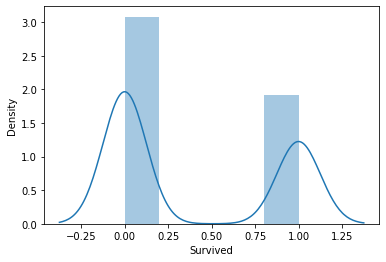

In [ ]:
sns.distplot(data_4['Survived'])

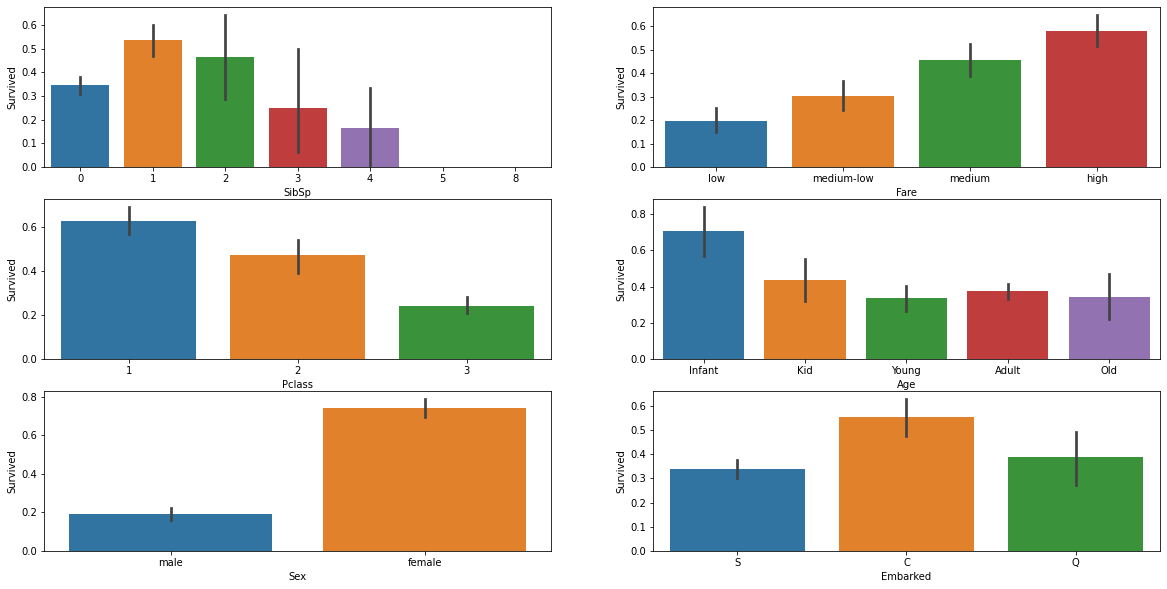

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'SibSp', y = 'Survived', data = data_4)
plt.subplot(322)
sns.barplot(x = 'Fare', y = 'Survived', data = data_4)
plt.subplot(323)
sns.barplot(x = 'Pclass', y = 'Survived', data = data_4)
plt.subplot(324)
sns.barplot(x = 'Age', y = 'Survived', data = data_4)
plt.subplot(325)
sns.barplot(x = 'Sex', y = 'Survived', data = data_4)
plt.subplot(326)
sns.barplot(x = 'Embarked', y = 'Survived', data = data_4)

In [ ]:
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data = pd.get_dummies(data_3[dummies])

In [ ]:
dummies = ['Fare', 'Age', 'Embarked', 'Sex']
dummy_data = pd.get_dummies(data_4[dummies])

In [ ]:
data_6 = pd.concat([data_4, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

In [ ]:
data_6 = pd.concat([data_3, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

In [ ]:
data_6

,Survived,Pclass,SibSp,Parch,Fare_low,Fare_medium-low,Fare_medium,Fare_high,Age_Infant,Age_Kid,Age_Young,Age_Adult,Age_Old,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
4,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,0,0,0,0,1,0,0,0,1,1,0
889,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X = data_6.drop('Survived', axis = 1)
y = data_6['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
accuracy_score(y_pred, y_test)

0.7982062780269058

In [ ]:
confusion_matrix(y_pred, y_test)

array([[116,  22],
       [ 23,  62]])

In [ ]:
y_pred = log_reg.predict(data_6)

In [ ]:
y_pred.shape

(418,)

In [ ]:
df_test['Predictions']=y_pred
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predictions
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
df_test.to_csv('./Test-Predctions.csv')